In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot') #更改绘图风格，R语言绘图库的风格
plt.rcParams['font.sans-serif'] = 'SimHei'

In [12]:
#导入数据
columns = ['user_id', 'order_dt', 'order_products', 'order_amount']
df = pd.read_table('practice_data/CDNOW_master.txt', names=columns, sep='\s+') #sep='\s+': 匹配任意个空格
df

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
...,...,...,...,...
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12


In [13]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


### 数据预处理

In [40]:
df['order_date'] = pd.to_datetime(df['order_dt'], format='%Y%m%d')
df['month'] = df['order_date'].values.astype('datetime64[M]')
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


Text(0.5, 1.0, '每月的消费人数')

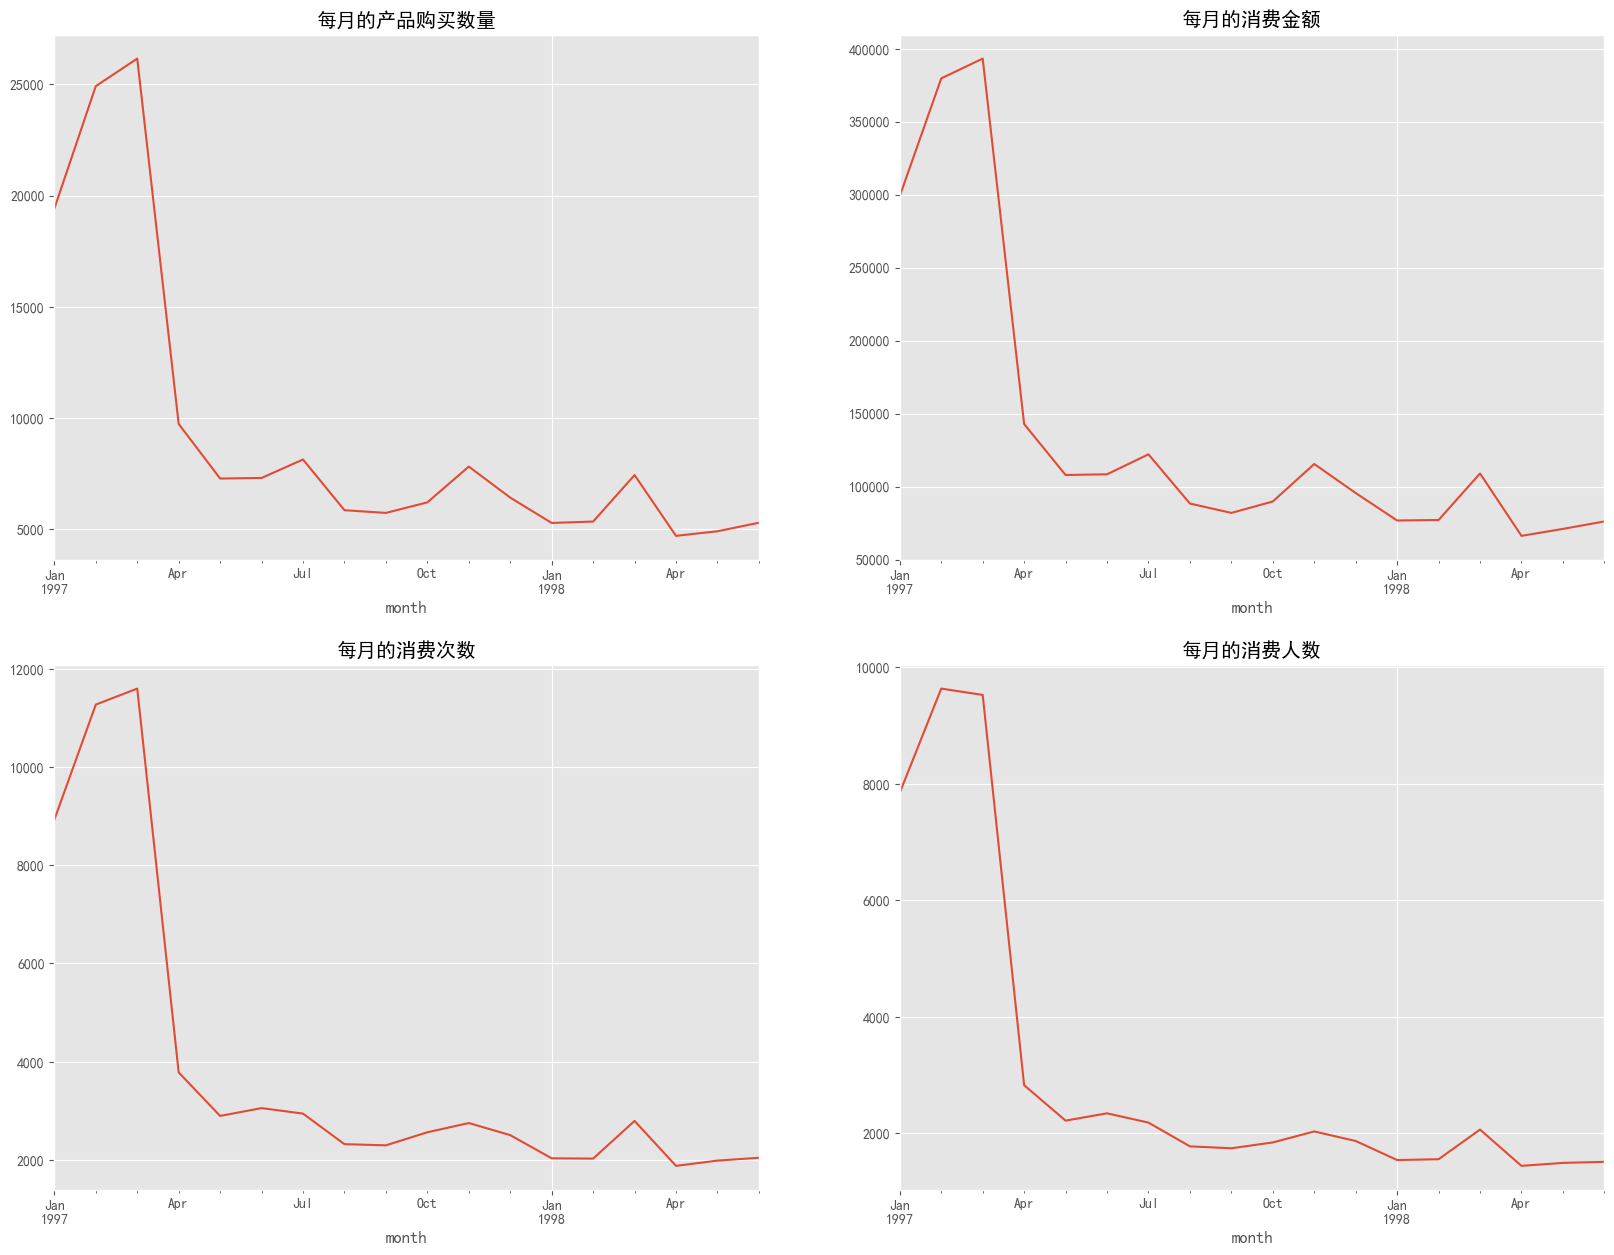

In [15]:
# 按月份统计产品购买数量，消费金额，消费次数，消费人数
plt.figure(figsize=(20,15))
plt.subplot(221)
df.groupby(by='month')['order_products'].sum().plot()
plt.title('每月的产品购买数量')
plt.subplot(222)
df.groupby(by='month')['order_amount'].sum().plot()
plt.title('每月的消费金额')
plt.subplot(223)
df.groupby(by='month')['user_id'].count().plot()
plt.title('每月的消费次数')
plt.subplot(224)
df.drop_duplicates(subset=['user_id', 'month']).groupby(by='month')['user_id'].count().plot()
plt.title('每月的消费人数')

### 用户个体消费分析

#### 1. 用户消费金额，消费次数（产品数量）描述统计

In [16]:
df = pd.read_table('practice_data/CDNOW_master.txt', names=columns, sep='\s+')
user_grouped = df.groupby(by='user_id').sum()
user_grouped.describe()

,order_dt,order_products,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


<Axes: xlabel='order_products', ylabel='order_amount'>

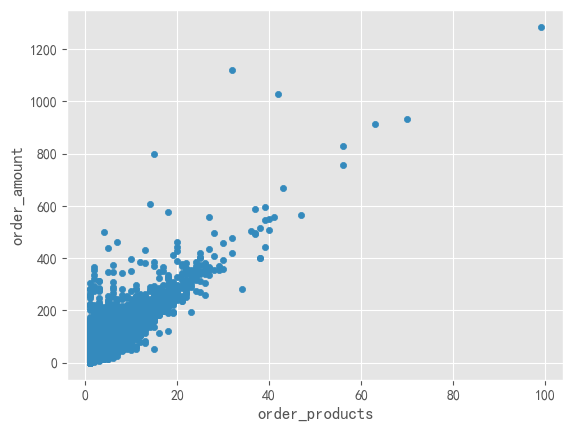

In [17]:
df.plot(kind='scatter', x='order_products', y='order_amount')

### 2. 用户消费分布图

<Axes: ylabel='Frequency'>

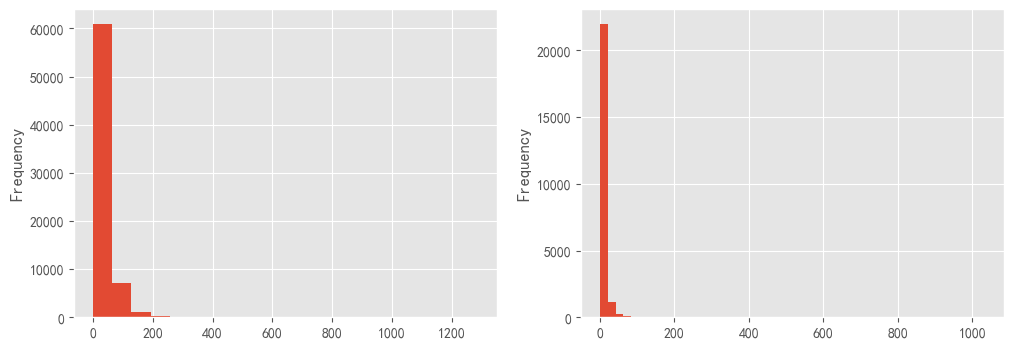

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.xlabel('每个订单的消费金额')
df['order_amount'].plot(kind='hist', bins=20)

plt.subplot(122)
plt.xlabel('每个uid购买数量')
df.groupby(by='user_id')['order_products'].sum().plot(kind='hist', bins=50
                                                    )

### 3. 用户累计消费金额占比分析（用户的贡献度）

In [19]:
user_cumsum = df.groupby(by='user_id')['order_amount'].sum().sort_values().reset_index()
user_cumsum

,user_id,order_amount
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [20]:
user_cumsum['amount_cumsum'] = user_cumsum['order_amount'].cumsum()
user_cumsum['amount_cumsum'] 

0              0.00
1              0.00
2              0.00
3              0.00
4              0.00
            ...    
23565    2463822.60
23566    2470375.30
23567    2477348.37
23568    2486324.70
23569    2500315.63
Name: amount_cumsum, Length: 23570, dtype: float64

<Axes: >

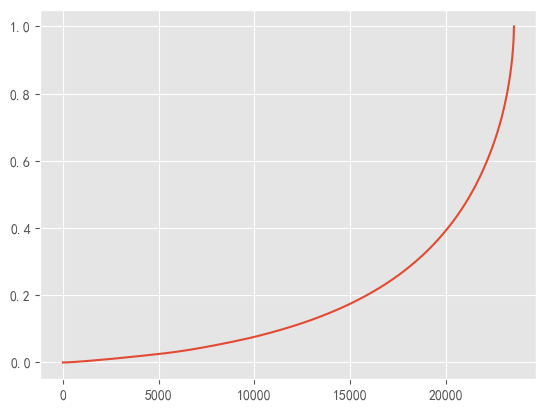

In [21]:
#消费金额总值
amount_total = user_cumsum['amount_cumsum'].max()
# 前i个用户的贡献度
user_cumsum['contribute'] = user_cumsum.apply(lambda x: x['amount_cumsum'] / amount_total, axis=1)
user_cumsum['contribute'].plot()

### 用户消费行为

#### 1. 首购时间

<Axes: xlabel='order_date'>

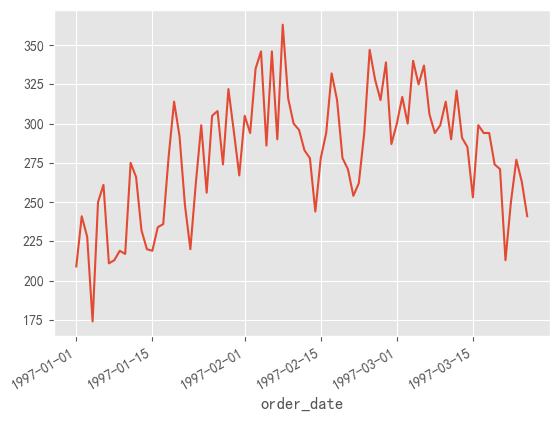

In [22]:
df['order_date'] = pd.to_datetime(df['order_dt'], format='%Y%m%d')
df.groupby(by='user_id')['order_date'].min().value_counts().plot()

#### 2. 最后一次购买时间

<Axes: xlabel='order_date'>

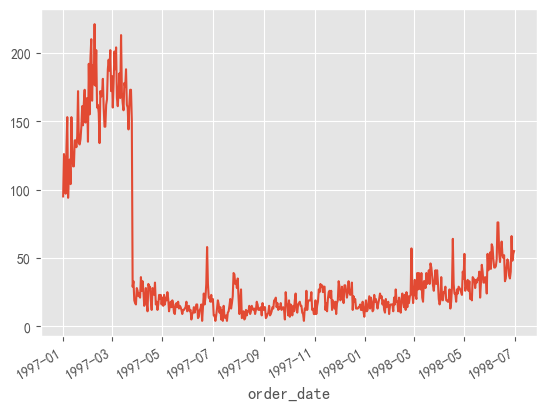

In [23]:
df.groupby(by='user_id')['order_date'].max().value_counts().plot()

### 用户分层

#### 1.构建RFM模型

In [24]:
rfm = df.pivot_table(index='user_id', values=['order_products', 'order_amount', 'order_date'],
                    aggfunc={
                        'order_date':'max', #最后一次购买
                        'order_products':'sum', #购买产品的数量
                        'order_amount':'sum' #消费总金额
                    })
rfm.head()

,order_amount,order_date,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [25]:
rfm['R'] = -(rfm['order_date'] - rfm['order_date'].max()) / np.timedelta64(1, 'D')
rfm.rename(columns={'order_products':'F', 'order_amount':'M'}, inplace=True)
rfm.head()

,M,order_date,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [35]:
def rfm_func(x):
    level = x.apply(lambda x: '1' if x>=1 else '0')
    label = level['R'] + level['F'] + level['M']    
    d={
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'
    }
    result = d[label]
    return result

In [36]:
#RFM计算方式： 每一列数据减去数据所在列平均值，有正有负，根据结果与1作比较，如果》=1，为1，否则为0
rfm['label'] = rfm[['R','F','M']].apply(lambda x: x - x.mean()).apply(rfm_func, axis=1)
rfm.head()

,M,order_date,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,6,534.0,一般发展客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般挽留客户
5,385.61,1998-01-03,29,178.0,重要保持客户


Text(0, 0.5, 'R')

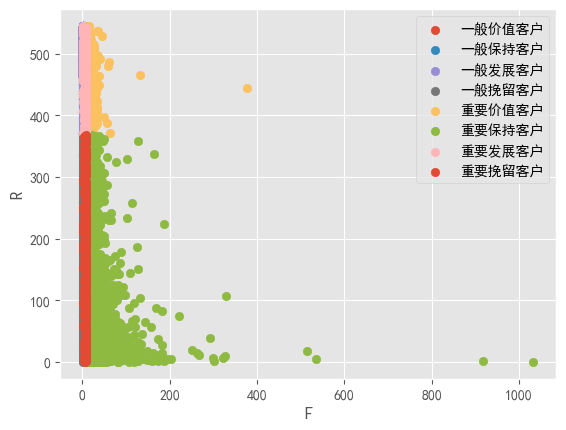

In [39]:
#客户分层可视化
for label, grouped in rfm.groupby(by='label'):
    x = grouped['F']
    y = grouped['R']
    plt.scatter(x, y, label=label)
plt.legend()
plt.xlabel('F')
plt.ylabel('R')

### 新老，活跃，回流用户分析

In [42]:
pivoted_counts = df.pivot_table(
    index='user_id',
    columns = 'month',
    values = 'order_dt',
    aggfunc = 'count'
).fillna(0)
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# 用0，1替换，1表示消费过
df_purchase = pivoted_counts.applymap(lambda x: 1 if x>0 else 0)
# apply :作用于pd的一行或一列
# applymap：作用于pd的每个元素
# map：series函数，无法在df使用，作用与series中每一个元素
df_purchase

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# 判断是否时新用户，活跃用户，不活跃用户，回流用户
def active_status(data):
    status = [] #存储18个月的状态
    for i in range(18):
        if data[i] == 0:
            if len(status) == 0:
                status.append('unreg')
            else:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status, df_purchase.columns)

purchase_states = df_purchase.apply(active_status, axis=1)
purchase_states

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [52]:
#用Nan替换unreg
purchase_states_ct = purchase_states.replace('unreg', np.NaN).apply(lambda x:pd.value_counts(x))
purchase_states_ct.fillna(0, inplace=True)
purchase_states_ct

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,0.0,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
return,0.0,0.0,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,0.0,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


<Axes: xlabel='month'>

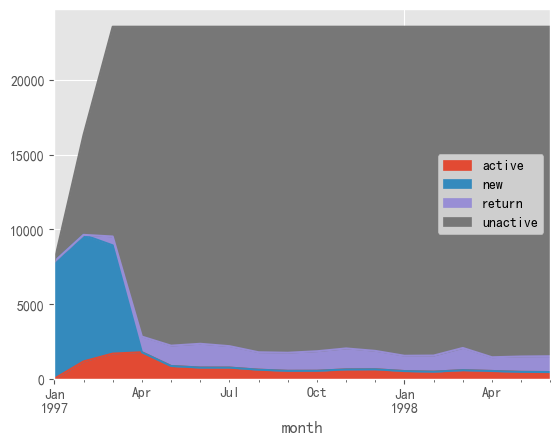

In [53]:
purchase_states_ct.T.plot.area()

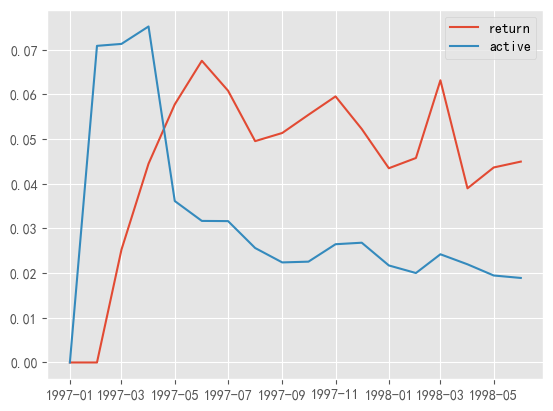

In [61]:
#回流用户占比
rate = purchase_states_ct.T.fillna(0).apply(lambda x: x/x.sum() ,axis=1)
plt.plot(rate['return'], label='return')
plt.plot(rate['active'], label='active')
plt.legend()

### 用户的购买周期


In [62]:
#计算购买周期
order_diff = df.groupby(by='user_id').apply(lambda x: x['order_date']-x['order_date'].shift())
order_diff

user_id       
1        0           NaT
2        1           NaT
         2        0 days
3        3           NaT
         4       87 days
                   ...  
23568    69654   11 days
         69655   17 days
23569    69656       NaT
23570    69657       NaT
         69658    1 days
Name: order_date, Length: 69659, dtype: timedelta64[ns]

Text(0.5, 0, '消费周期')

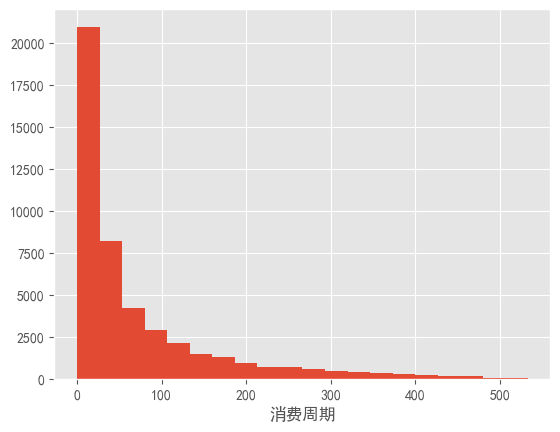

In [65]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20)
plt.xlabel('消费周期')

### 用户生命周期

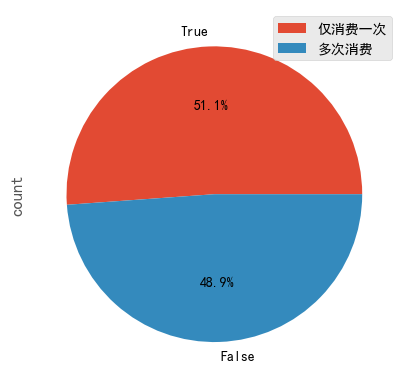

In [71]:
user_period = df.groupby('user_id')['order_date'].agg(['min','max'])
(user_period['max']==user_period['min']).value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(['仅消费一次','多次消费'])

### 绘制所有用户生命周期直方图+多次消费 

Text(0, 0.5, '用户人数')

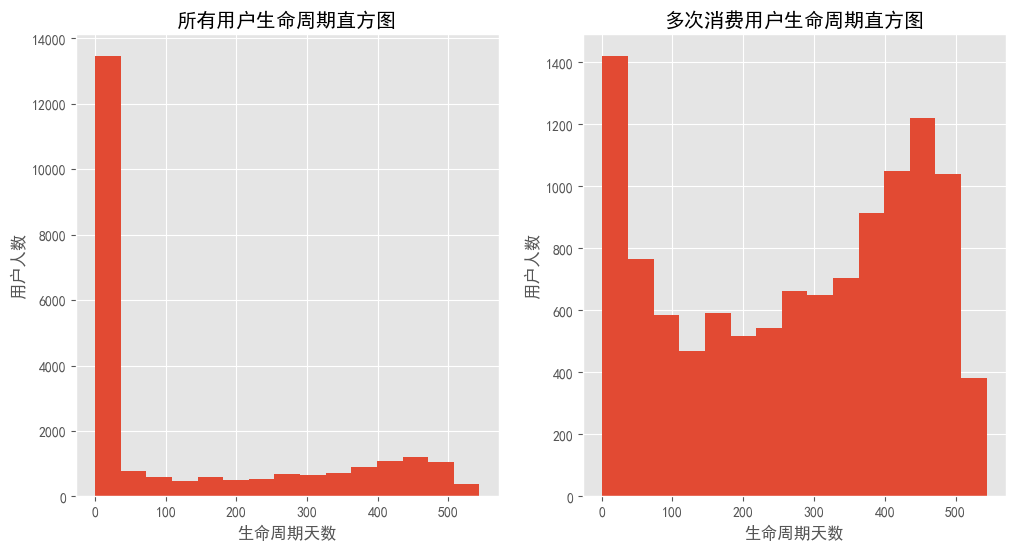

In [80]:
plt.figure(figsize=(12,6))
plt.subplot(121)
((user_period['max']-user_period['min'])/np.timedelta64(1,'D')).hist(bins=15)
plt.title('所有用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')
plt.subplot(122)
u_1 = (user_period['max']-user_period['min']).reset_index()[0]/np.timedelta64(1,'D')
u_1[u_1>0].hist(bins=15)
plt.title('多次消费用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

### 复购率和回购率分析

#### 复购率分析

计算方式：在自然月内，购买多次的用户在总消费人数中占比

In [82]:
purchase_reapeat = pivoted_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x==0 else 0)
purchase_reapeat

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='month'>

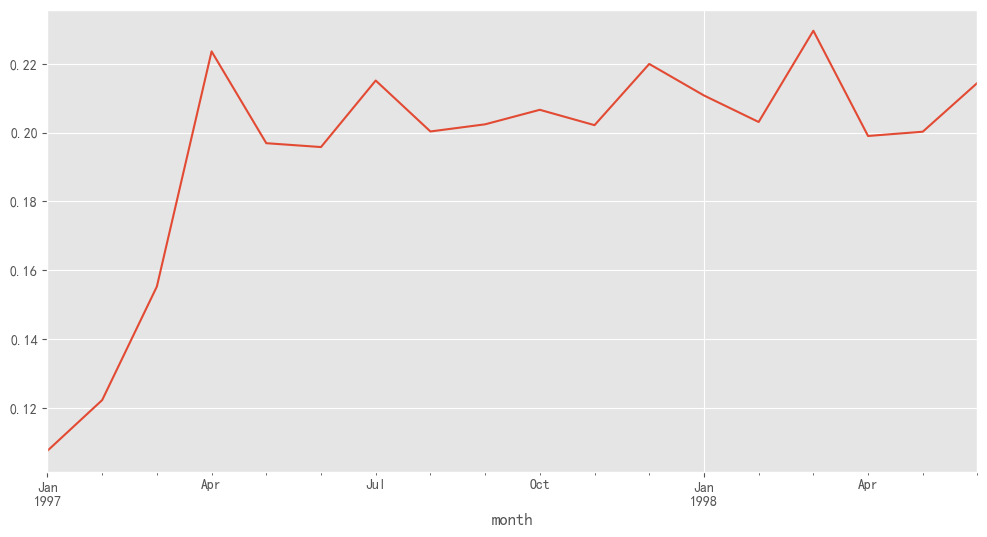

In [83]:
(purchase_reapeat.sum() / purchase_reapeat.count()).plot(figsize=(12,6))

回购率分析

计算方式：在一个时间窗口内进行了消费，在下一个时间窗口又进行了消费

In [85]:
def purchase_back(data):
    status = [] #存储用户回购率状态
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            elif data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status, df_purchase.columns)

purchase_b = df_purchase.apply(purchase_back, axis=1)
purchase_b

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


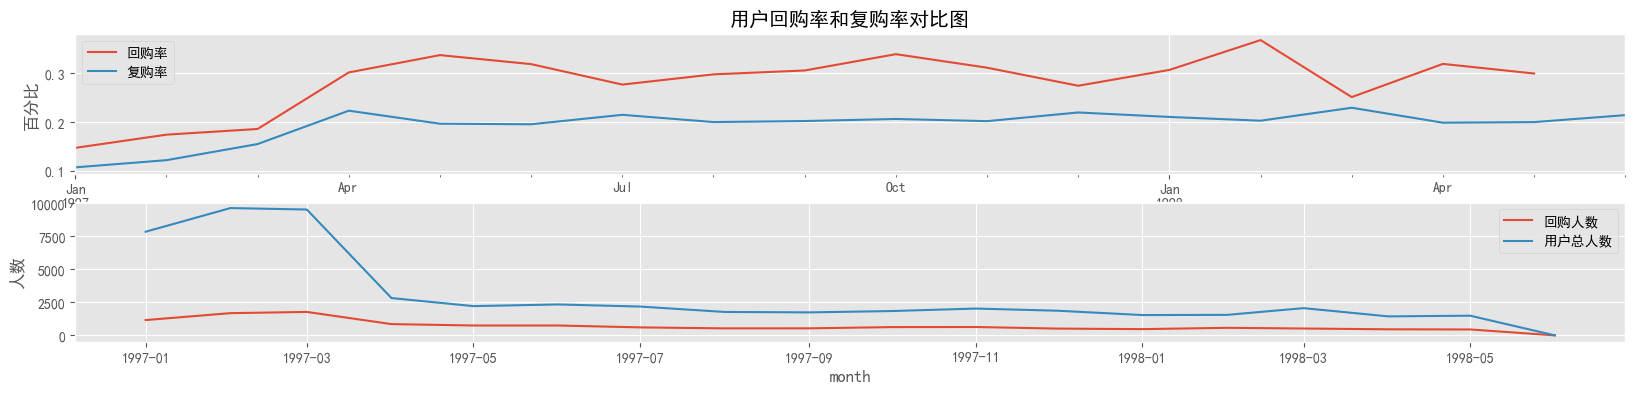

In [91]:
plt.figure(figsize=(20,4))
plt.subplot(211)
(purchase_b.sum() / purchase_b.count()).plot(label='回购率')
(purchase_reapeat.sum() / purchase_reapeat.count()).plot(label='复购率')
plt.legend()
plt.ylabel('百分比')
plt.title('用户回购率和复购率对比图')
plt.subplot(212)
plt.plot(purchase_b.sum(), label='回购人数')
plt.plot(purchase_b.count(), label='用户总人数')
plt.xlabel('month')
plt.ylabel('人数')
plt.legend()

TypeError: sum() takes at least 1 positional argument (0 given)

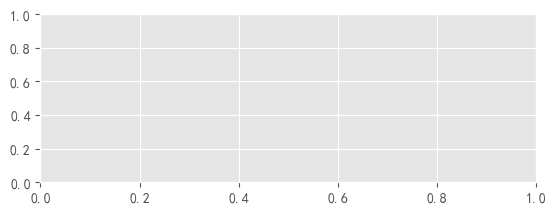